In [1]:
#Loading the essential libraries

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing

#plotting libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#relevant ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)



In [3]:
# Loading the training and test dataset

In [4]:
#Loading the data set to pandas data set
train = pd.read_csv('/content/loandataset.csv')
test = pd.read_csv('/content/testdataset.csv')

In [5]:
# Checking the type of data frame
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
# For sample of data we are taking the first five column of the data set
# Printing the first 5 rows of the data frame
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Data Processing

In [9]:
loan_dataset=pd.concat([train,test])

In [10]:
# Statistical measures
# Only Qunatitative data will be taken under this command
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
#number of missing value in each codes
loan_dataset.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [13]:
# Checking the missing values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Label and encoding (replacing the N=0 and Y=1)
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}, inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
# Printing the first 5 rows of the data frame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
#locking th variables "loan_status"
loan_dataset.loc[:, "Loan_Status"]

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [17]:
# Dependent Column Values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [18]:
#eplacing the value of 3+ to 4(it can mean any value greater than 3 which we denote by 4)
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [19]:
#Cheking the Dependent column
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [20]:
# Data Visualisation

In [21]:
#Univarirate Analysis

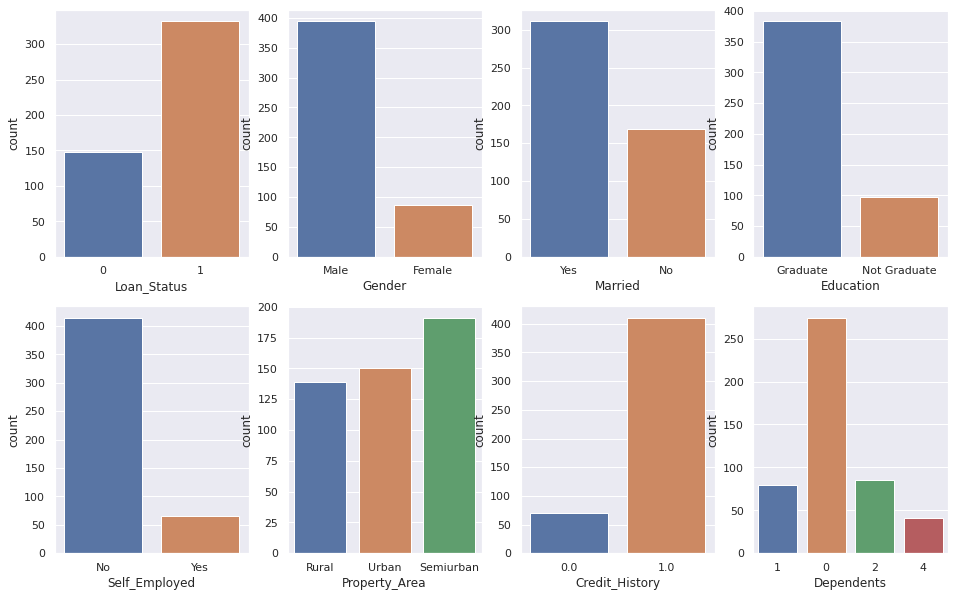

In [22]:
# Gender & Loan Status Plotting
fig,ax = plt.subplots(2,4,figsize = (16,10))
sns.countplot(x='Loan_Status',data= loan_dataset,ax=ax[0][0])
sns.countplot(x='Gender',data= loan_dataset,ax=ax[0][1])
sns.countplot(x='Married',data= loan_dataset, ax=ax[0][2])
sns.countplot(x='Education',data= loan_dataset,ax=ax[0][3])
sns.countplot(x='Self_Employed',data= loan_dataset,ax=ax[1][0])
sns.countplot(x='Property_Area',data= loan_dataset,ax=ax[1][1])
sns.countplot(x='Credit_History',data= loan_dataset,ax=ax[1][2])
sns.countplot(x='Dependents',data= loan_dataset,ax=ax[1][3])

In [23]:
# Bivariate Analysis 

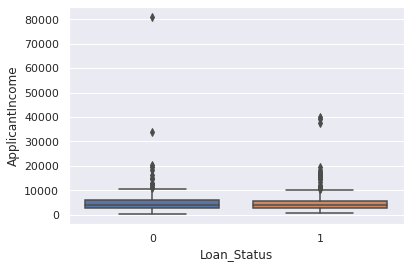

In [24]:
#box plot of Loan status and applicant income
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=loan_dataset) 

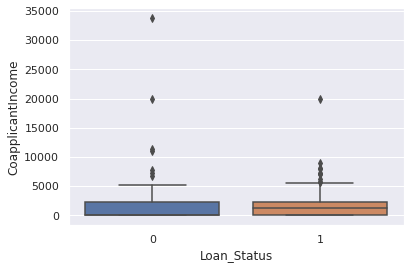

In [25]:
#box plot of Loan status and Coapplicant income
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=loan_dataset)

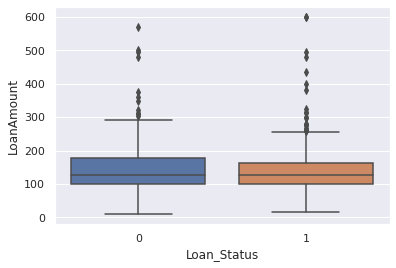

In [26]:
#box plot of Loand amount and LoanAmount
sns.boxplot(x='Loan_Status',y='LoanAmount',data=loan_dataset)

In [27]:
#correlation Martix

<function matplotlib.pyplot.show(*args, **kw)>

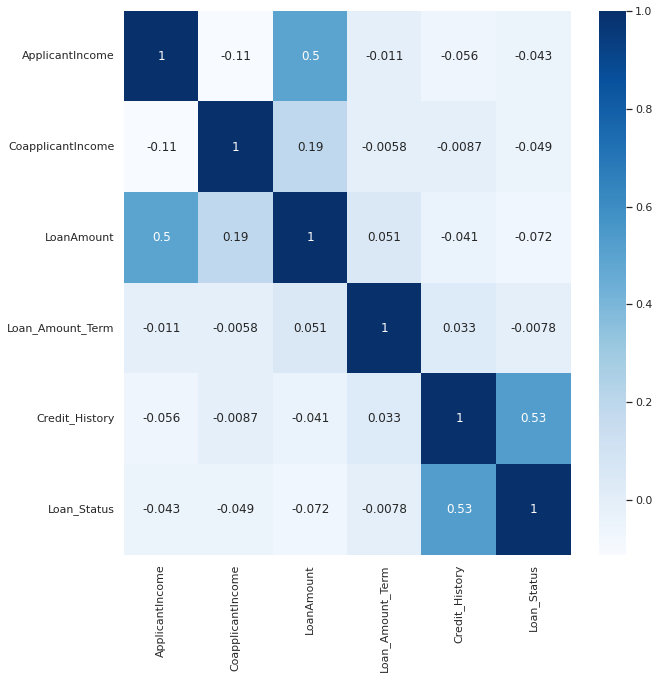

In [28]:
plt.figure(figsize=(10,10))
correlation_matrix = loan_dataset.corr()
sns.heatmap(correlation_matrix,cmap="Blues",annot=True)
plt.show

In [29]:
#correlation table
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-29-43aac7b5df2d>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.00,-0.11,0.50,-0.01,-0.06,-0.04
CoapplicantIncome,-0.11,1.00,0.19,-0.01,-0.01,-0.05
LoanAmount,0.50,0.19,1.00,0.05,-0.04,-0.07
Loan_Amount_Term,-0.01,-0.01,0.05,1.00,0.03,-0.01
Credit_History,-0.06,-0.01,-0.04,0.03,1.00,0.53
Loan_Status,-0.04,-0.05,-0.07,-0.01,0.53,1.00


In [30]:
# Assinging the numeric value to the qualitative data
loan_dataset.replace({"Married":{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':2}}, inplace= True)

In [31]:
loan_dataset.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,2,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
#separate the data and label
X= loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis =1)
Y= loan_dataset['Loan_Status']

In [33]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          2              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [34]:
#Train Test Split

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Decision tree

In [37]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

Y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
DT_SC = accuracy_score(Y_predict,Y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.79      0.91      0.85        33

    accuracy                           0.77        48
   macro avg       0.74      0.69      0.70        48
weighted avg       0.76      0.77      0.76        48

77.08% Accurate


In [38]:
#printing the outcome to CSV file
Decision_Tree=pd.DataFrame({'Y_test':Y_test,'prediction':Y_predict})
Decision_Tree.to_csv("Dection Tree.csv") 



Support Vector Machine Model

In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
#training the support vector model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [41]:
# Model Evaluation

In [42]:
# Accuracy Score on training data
X_train_predication = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication,Y_train)

In [43]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7916666666666666


In [44]:
# Accuracy Score on testing data
X_test_predication = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predication,Y_test)

In [45]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8333333333333334


Making a predictive a variable system

In [46]:
#printing the outcome to CSV file
Support_vector_machine=pd.DataFrame({'Y_test':Y_test,'prediction':Y_predict})
Support_vector_machine.to_csv("Support Vector Machine.csv") 

Random Forest

In [47]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

Y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
RF_SC = accuracy_score(Y_predict,Y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48

83.33% Accurate


In [48]:
#printing the outcome to CSV file
Random_Forest=pd.DataFrame({'Y_test':Y_test,'prediction':Y_predict})
Random_Forest.to_csv("Random Forest.csv")

Logistic Regression


In [50]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

Y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
LR_SC = accuracy_score(Y_predict,Y_test)
print('accuracy is',accuracy_score(Y_predict,Y_test))
print


              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48

accuracy is 0.8333333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function print>

In [51]:
#printing the outcome to CSV file
Logistic_Regression=pd.DataFrame({'Y_test':Y_test,'prediction':Y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")  

In [52]:
score = [DT_SC,RF_SC,LR_SC,test_data_accuracy]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression", "Supoort Vector Machine"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
1,Random Forest,0.833333
2,Logistic Regression,0.833333
3,Supoort Vector Machine,0.833333
0,Decision Tree,0.770833


:)